# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: diabetes.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Exploration

0    500
1    268
Name: Outcome, dtype: int64


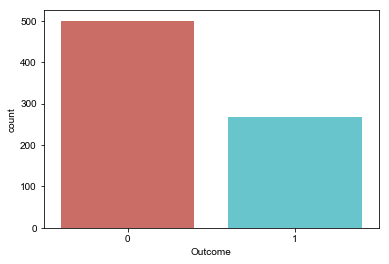

In [2]:
print(data['Outcome'].value_counts())

sns.countplot(x='Outcome',data = data, palette='hls',order = data['Outcome'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Correlation

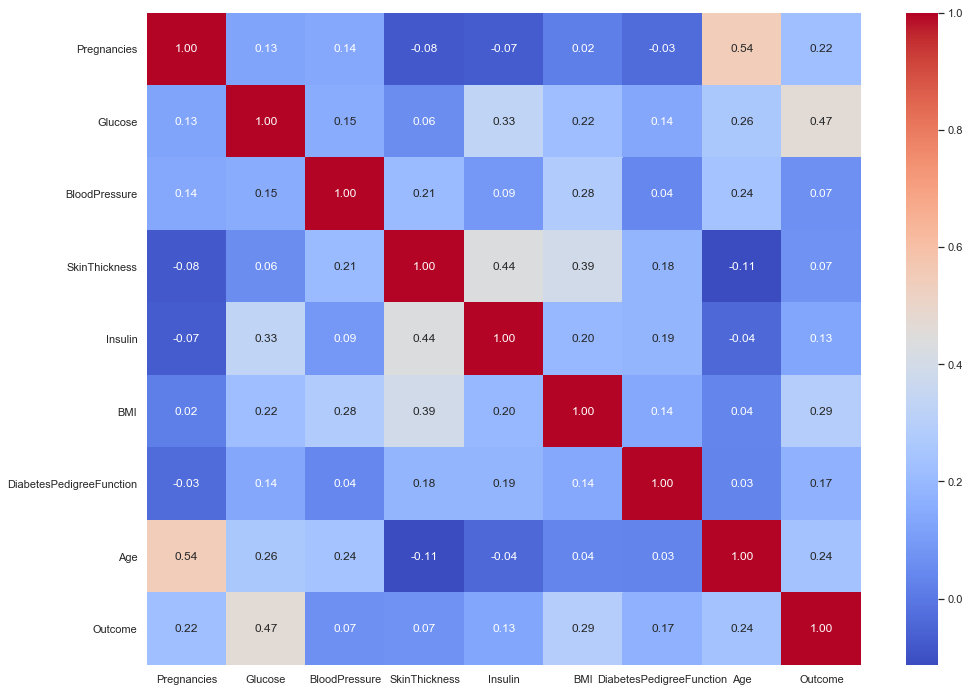

In [4]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Data Processing and Selection

In [7]:
X = data.iloc[:, 0:8].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (768, 8)


array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ]])

In [8]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (768,)


array([1, 0, 1, 0, 1], dtype=int64)

## Data Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (768, 8)


array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (537, 8) (537,)
X TEST Set :  (231, 8) (231,)


## Gradient Boosting Classifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

R-Square               : 0.1251
Mean Absolute Error    : 0.2035
Mean Squared Error     : 0.2035
Root Mean Squared Error: 0.4511
Accuracy               : 0.7965
Precision              : 0.7639
Recall                 : 0.6471


## Data Prediction

In [12]:
df_pred1 = data[data.index == 3]
df_pred2 = data[data.index == 4]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
Xhat = df_pred.iloc[:, 0:8].values
Xhat = scaler.transform(Xhat)

yhat = data.iloc[:, -1].values

In [15]:
GB_pred = gb.predict(Xhat)
GB_pred

array([0, 1], dtype=int64)